# Lab-3.Fuel Amount Prediction Using Linear Regression

# 225229138_Sowmiya B

# Step1: Creating fuel_data.csv file

# step2:import Dataset

In [1]:
import pandas as pd
fuel=pd.read_csv("fuel_data.csv")
fuel

,drivenKM,fuelAmount
0,390.00,3600.0
1,403.00,3705.0
2,396.50,3471.0
3,383.50,3250.5
4,321.10,3263.7
5,391.30,3445.2
6,386.10,3679.0
7,371.80,3744.5
8,404.30,3809.0
9,392.20,3905.0


In [2]:
fuel.shape

(19, 2)

In [3]:
fuel.head()

,drivenKM,fuelAmount
0,390.0,3600.0
1,403.0,3705.0
2,396.5,3471.0
3,383.5,3250.5
4,321.1,3263.7


In [4]:
fuel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   drivenKM    19 non-null     float64
 1   fuelAmount  19 non-null     float64
dtypes: float64(2)
memory usage: 432.0 bytes


In [5]:
len(fuel.columns)

2

In [6]:
fuel.dtypes

drivenKM      float64
fuelAmount    float64
dtype: object

# Step3:Preprocessing

In [7]:
d=fuel.isnull()
d

,drivenKM,fuelAmount
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


# Step 4:Visualize Relationships

In [8]:
import seaborn as sns

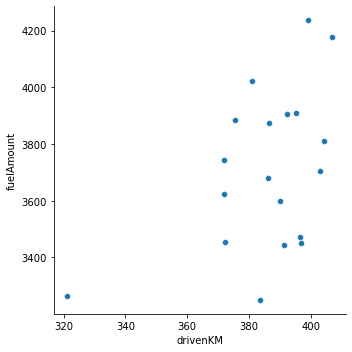

In [9]:
sns.relplot(data=fuel,x="drivenKM",y="fuelAmount")

# Step 5: Prepare X Matrix and Y vector

In [10]:
feature = fuel[['drivenKM']]
feature

,drivenKM
0,390.00
1,403.00
2,396.50
3,383.50
4,321.10
5,391.30
6,386.10
7,371.80
8,404.30
9,392.20


In [11]:
label =fuel[['fuelAmount']]
label

,fuelAmount
0,3600.0
1,3705.0
2,3471.0
3,3250.5
4,3263.7
5,3445.2
6,3679.0
7,3744.5
8,3809.0
9,3905.0


In [12]:
fuel.describe()

,drivenKM,fuelAmount
count,19.000000,19.000000
mean,385.548947,3710.684211
std,19.094297,281.892805
min,321.100000,3250.500000
25%,378.300000,3462.600000
50%,390.000000,3705.000000
75%,396.750000,3894.400000
max,407.000000,4235.900000


# Step 6: Examine X and Y

In [13]:
print(feature)
print("Type of X Matrix",type(feature))
print(label)
print("Type of Y Vector ",type(label))

    drivenKM
0     390.00
1     403.00
2     396.50
3     383.50
4     321.10
5     391.30
6     386.10
7     371.80
8     404.30
9     392.20
10    386.43
11    395.20
12    381.00
13    372.00
14    397.00
15    407.00
16    372.40
17    375.60
18    399.00
Type of X Matrix <class 'pandas.core.frame.DataFrame'>
    fuelAmount
0       3600.0
1       3705.0
2       3471.0
3       3250.5
4       3263.7
5       3445.2
6       3679.0
7       3744.5
8       3809.0
9       3905.0
10      3874.0
11      3910.0
12      4020.7
13      3622.0
14      3450.5
15      4179.0
16      3454.2
17      3883.8
18      4235.9
Type of Y Vector  <class 'pandas.core.frame.DataFrame'>


# Step 7: Split dataset

In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(feature, label,test_size=0.20, random_state=42)
print(x_train, x_test, y_train, y_test)

    drivenKM
8     404.30
16    372.40
3     383.50
13    372.00
15    407.00
17    375.60
2     396.50
9     392.20
18    399.00
4     321.10
12    381.00
7     371.80
10    386.43
14    397.00
6     386.10     drivenKM
0      390.0
5      391.3
11     395.2
1      403.0     fuelAmount
8       3809.0
16      3454.2
3       3250.5
13      3622.0
15      4179.0
17      3883.8
2       3471.0
9       3905.0
18      4235.9
4       3263.7
12      4020.7
7       3744.5
10      3874.0
14      3450.5
6       3679.0     fuelAmount
0       3600.0
5       3445.2
11      3910.0
1       3705.0


In [15]:
x_train.shape

(15, 1)

In [16]:
x_test.shape

(4, 1)

In [17]:
y_train.shape

(15, 1)

In [18]:
y_test.shape

(4, 1)

# Part-I :Linear Regression Baseline Model

# Step 8: Build Model

In [19]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x_train,y_train)

LinearRegression()

# STEP 9 :Predict Price for 800 KM

In [20]:
lin_reg.predict([[800]])

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[6905.64571567]])

# Step 10:Predict on entire dataset

In [21]:
from sklearn.metrics import mean_squared_error
y_pred = lin_reg.predict(x_test)

In [22]:
y_pred

array([[3775.81615646],
       [3785.74000628],
       [3815.51155575],
       [3875.05465468]])

# Step 11: Print mean sqaured error and R2 error

In [53]:
mse= mean_squared_error(y_test,y_pred)
mse

46181.36710639157

In [24]:
lin_reg.coef_

array([[7.63373063]])

In [25]:
lin_reg.intercept_

array([798.6612099])

In [26]:
y_pred_data = lin_reg.predict(x_train)
y_pred_data

array([[3884.9785045 ],
       [3641.46249733],
       [3726.19690735],
       [3638.40900508],
       [3905.58957721],
       [3665.89043536],
       [3825.43540557],
       [3792.61036385],
       [3844.51973215],
       [3249.8521159 ],
       [3707.11258077],
       [3636.88225895],
       [3748.5637381 ],
       [3829.25227089],
       [3746.04460699]])

In [27]:
lin_reg.score(x_test,y_test)

-0.6180990161577029

# Part-II.Linear Regression with scaling using standardscaler

# Step 12:Normalise x_train and x_test values

In [55]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [56]:
norm_x_train = scaler.fit_transform(x_train)
norm_x_test = scaler.transform(x_test)
norm_y_train = scaler.fit_transform(y_train)
norm_y_test = scaler.transform(y_test)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


# Step: 13 .Build Linear Regression Model

In [30]:
norm_lreg = LinearRegression()
norm_lreg.fit(norm_x_train,norm_y_train)

LinearRegression()

In [31]:
norm_y_pred = norm_lreg.predict(norm_x_test)

# Step 14: Print Mean Squared Error and R2 Error

In [32]:
norm_mse = mean_squared_error(norm_y_test,norm_y_pred)
norm_mse

0.5305638937646869

# Step 15: Plot Scatter Plot

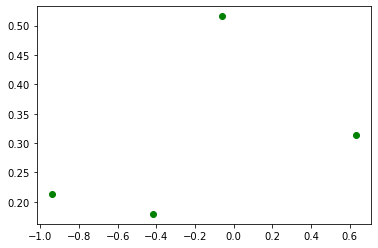

In [33]:
import matplotlib.pyplot as plt
plt.plot(norm_y_test,norm_y_pred,"go")

# Part_III.Linear Regression with scaling using MinMaxscaler

# Step16:Repeat with MinMaxscaler

In [34]:
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()

In [35]:
mm_norm_x_train = minmax.fit_transform(x_train)
mm_norm_y_train = minmax.fit_transform(y_train)
mm_norm_x_test = minmax.transform(x_test)
mm_norm_y_test = minmax.transform(y_test)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- drivenKM
Feature names seen at fit time, yet now missing:
- fuelAmount

  warnings.warn(message, FutureWarning)


In [36]:
mm_norm_lreg = LinearRegression()
mm_norm_lreg.fit(mm_norm_x_train,mm_norm_y_train)

LinearRegression()

In [37]:
mm_norm_y_pred = mm_norm_lreg.predict(mm_norm_x_test)
mm_norm_y_pred

array([[-1.93238929],
       [-1.93151139],
       [-1.92887767],
       [-1.92361023]])

In [38]:
mm_norm_y_test

array([[0.3546783 ],
       [0.19758474],
       [0.66927136],
       [0.46123402]])

In [39]:
minmax_norm_mse = mean_squared_error(mm_norm_y_test,mm_norm_y_pred)
minmax_norm_mse

5.550397233153774

#### prepare the model with input scaling
pipeline = Pipeline(steps=[('normalize', MinMaxScaler()), ('model', LinearRegression())])

#### fit pipeline
pipeline.fit(train_x, train_y)

#### make predictions
yhat = pipeline.predict(test_x)

In [40]:
y_test = y_test.to_numpy()

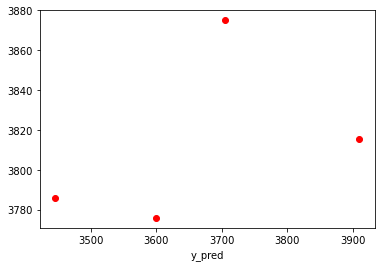

In [41]:
plt.xlabel("y_test")
plt.xlabel("y_pred")
plt.plot(y_test,y_pred,"ro")

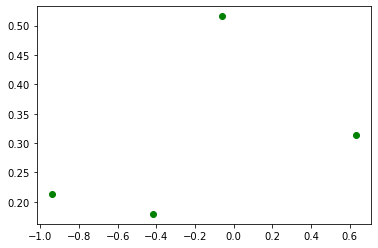

In [42]:
plt.plot(norm_y_test,norm_y_pred,"go")

# Step 17: Compare KNN Regressor

In [43]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=5) 
knn.fit(x_train,y_train)

KNeighborsRegressor()

In [44]:
print(knn.predict([[800]]))

[[3829.08]]


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


In [45]:
knn_y_pred = knn.predict(x_test)
knn_mse = mean_squared_error(knn_y_pred,y_test)
knn_mse

21241.836200000045

# Step 18: Compare SGD Regressor

In [46]:
import numpy as np

In [47]:
from sklearn import linear_model
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
max_iter = np.ceil(10**6/x_train.shape[0])
sgd= make_pipeline(StandardScaler(),linear_model.
                   SGDRegressor(max_iter = max_iter,tol=1e-3))
print(type(x_train))

<class 'pandas.core.frame.DataFrame'>


In [48]:
x_train = x_train.to_numpy()
y_train = y_train.to_numpy()

In [49]:
sgd.fit(x_train,y_train)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdregressor', SGDRegressor(max_iter=66667.0))])

In [50]:
sgd_y_pred = sgd.predict(x_test)
sgd_y_pred

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


array([3775.24127865, 3785.15809557, 3814.90854634, 3874.40944789])

In [51]:
sgd_mse = mean_squared_error(y_test,sgd_y_pred)
sgd_mse

46005.739519952054

# Step 19: Select best model

In [54]:
from tabulate import tabulate
data = [["MODELS","MSE VALUE"],
       ["LINEAR REGRESSION",round(mse)],
       ["STANDARD SCALER LR ",round(norm_mse)],
       [" MINMAX  LR",round(minmax_norm_mse) ],
       ["KNN",round(knn_mse)],
       ["SGD",round(sgd_mse)]]
print(tabulate(data))

------------------  ---------
MODELS              MSE VALUE
LINEAR REGRESSION   46181
STANDARD SCALER LR  1
MINMAX  LR          6
KNN                 21242
SGD                 46006
------------------  ---------
